# KNeighbors Regressor 

The KNeighbors Regressor is a machine learning algorithm that uses a k-nearest neighbor approach to regression. It is used to predict the value of a target variable by finding the k nearest neighbors of each training example and then averaging their values. This approach can be useful for problems where the number of input features is much larger than the number of training examples.

In [17]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from matplotlib import pyplot as plt
import numpy as np
# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [18]:
# Import Data

data = pd.read_csv('data/data_prep_reg.csv', index_col=[0]) # includes the statistics of the features only location D
#data = pd.read_csv('data/data_prep_feat.csv', index_col=[0]) # includes all values as a new features only location D
#data = pd.read_csv('data/data_prep_reg_all.csv', index_col=[0]) # include the statistics of the features an all locations

print(f'Data: {data.shape}')


Data: (4990, 44)


In [19]:
#fillna
data = data.fillna(data.mean())

In [20]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.533776,0.840833,3.285000,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.195908,0.627500,1.705000,90.744167,90.102500,90.454477,0.149374,0.022312,90.471667,0.641667
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.124645,0.625000,1.608333,90.873333,90.284167,90.607307,0.139059,0.019337,90.620833,0.589167
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.186272,0.678333,2.197500,91.004167,90.217500,90.600544,0.172882,0.029888,90.600833,0.786667


In [21]:
columns_to_drop = ['target', 'location']
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 42)
y: (4990,)
X_train: (3493, 42)
y_train: (3493,)
X_test: (1497, 42)
y_test: (1497,)


In [22]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

# KNeighbors Regressor


In [23]:
# collect results 

test_results = {}

In [24]:
# Instantiate our model 
knr = KNeighborsRegressor()

# Train the model using our data
knr.fit(X_train, y_train)


# predict
y_pred_train = knr.predict(X_train)
y_pred_test = knr.predict(X_test)

RSME _ train: 23.73
RSME _ test: 30.55


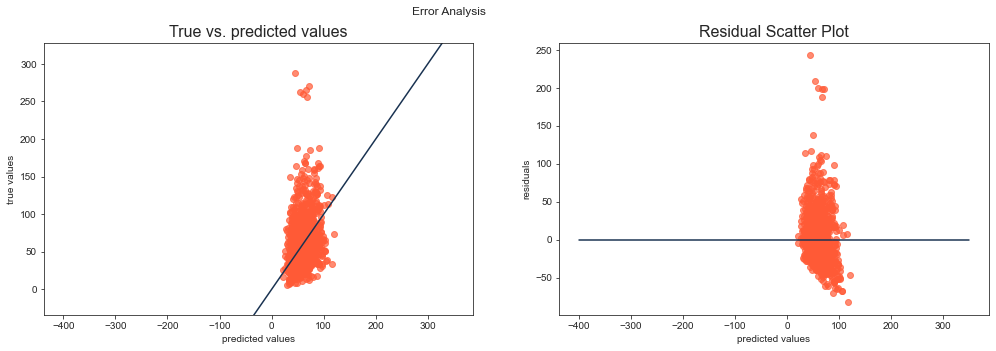

In [25]:
rsme_knr_train = rmse(y_train, y_pred_train )
rsme_knr_test = rmse(y_test, y_pred_test )

test_results['KNN'] = [rsme_knr_train, rsme_knr_test]

print(f'RSME _ train: {rsme_knr_train:.2f}')
print(f'RSME _ test: {rsme_knr_test:.2f}')

# error analysis train:
error_analysis(y_test, y_pred_test)

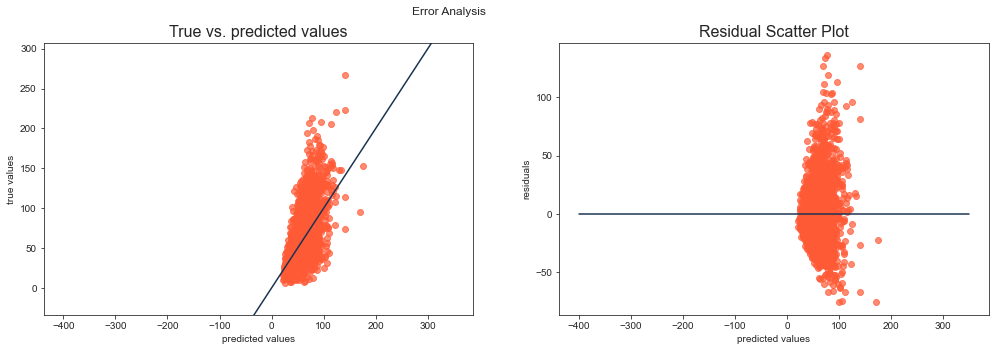

In [26]:
# error analysis train:
error_analysis(y_train, y_pred_train)

## KNR preprocessing

In [27]:
# make a pipeline 
scaler = StandardScaler()

pip = make_pipeline(StandardScaler(),
                    KNeighborsRegressor())

# train the model
pip.fit(X_train, y_train)

y_pred_train = pip.predict(X_train)
y_pred_test = pip.predict(X_test)

rsme_knrp_train = rmse(y_train, y_pred_train)
rsme_knrp_test = rmse(y_test, y_pred_test)

test_results['KNN StandardScaler'] = [rsme_knrp_train, rsme_knrp_test]

print(f'RSME _ train: {rsme_knrp_train:.2f}')
print(f'RSME _ test: {rsme_knrp_test:.2f}')

RSME _ train: 17.19
RSME _ test: 23.53


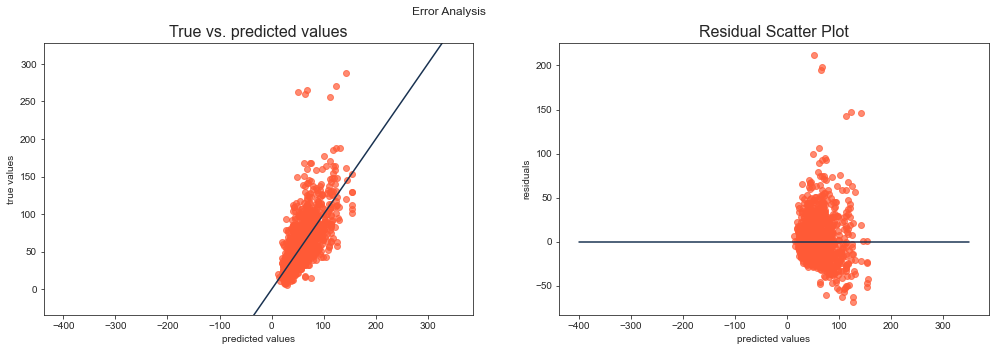

In [28]:
# error analysis train:
error_analysis(y_test, y_pred_test)

In [29]:
df = pd.DataFrame(test_results, columns= ['RMSE_Train', 'RMSE_Test'])
df

,RMSE_Train,RMSE_Test
